In [1]:
import xgboost
import numpy as np
import shap
from shap.explainers import pytree

/home/jarek/projects/shap/venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# simulate some binary data and a linear outcome with an interaction term
# note we make the features in X perfectly independent of each other to make
# it easy to solve for the exact SHAP values
N = 2000
X = np.zeros((N,5))
X[:1000,0] = 1
X[:500,1] = 1
X[1000:1500,1] = 1
X[:250,2] = 1
X[500:750,2] = 1
X[1000:1250,2] = 1
X[1500:1750,2] = 1
X[:,0:3] -= 0.5
y = 2*X[:,0] - 3*X[:,1]

In [3]:
# ensure the variables are independent
np.cov(X.T)

# array([[0.25012506, 0.        , 0.        , 0.        , 0.        ],
#        [0.        , 0.25012506, 0.        , 0.        , 0.        ],
#        [0.        , 0.        , 0.25012506, 0.        , 0.        ],
#        [0.        , 0.        , 0.        , 0.        , 0.        ],
#        [0.        , 0.        , 0.        , 0.        , 0.        ]])


array([[0.25012506, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.25012506, 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.25012506, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

In [4]:
# and mean centered
X.mean(0)

# array([0., 0., 0., 0., 0.])

array([0., 0., 0., 0., 0.])

In [5]:
# train a model with single tree
Xd = xgboost.DMatrix(X, label=y)
model = xgboost.train({
    'eta':1, 'max_depth':3, 'base_score': 0, "lambda": 0
}, Xd, 1)
print("Model error =", np.linalg.norm(y-model.predict(Xd)))
print(model.get_dump(with_stats=True)[0])

# Model error = 0.0
# 0:[f1<0] yes=1,no=2,missing=1,gain=4500,cover=2000
#         1:[f0<0] yes=3,no=4,missing=3,gain=1000,cover=1000
#                 3:leaf=0.5,cover=500
#                 4:leaf=2.5,cover=500
#         2:[f0<0] yes=5,no=6,missing=5,gain=1000,cover=1000
#                 5:leaf=-2.5,cover=500
#                 6:leaf=-0.5,cover=500

Model error = 0.0
0:[f1<0] yes=1,no=2,missing=1,gain=4500,cover=2000
	1:[f0<0] yes=3,no=4,missing=3,gain=1000,cover=1000
		3:leaf=0.5,cover=500
		4:leaf=2.5,cover=500
	2:[f0<0] yes=5,no=6,missing=5,gain=1000,cover=1000
		5:leaf=-2.5,cover=500
		6:leaf=-0.5,cover=500



In [6]:
# make sure the SHAP values add up to marginal predictions
pred = model.predict(Xd, output_margin=True)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xd)
np.abs(shap_values.sum(1) + explainer.expected_value - pred).max()

# 0.0

ile drzew cext? 1
uruchamiam z BANZ=False


0.0

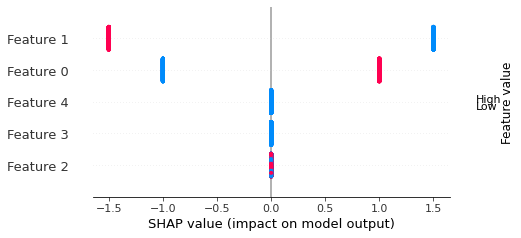

In [7]:
shap.summary_plot(shap_values, X)

# now we make a banzhaf value model

In [8]:
# from shap.explainers import pytree

# banz_explainer = pytree.BanzTreeExplainer(model)
# shap_values = banz_explainer.shap_values(Xd)
# np.abs(shap_values.sum(1) + banz_explainer.expected_value - pred).max()


In [9]:
# shap.summary_plot(shap_values, X)
shap_values

array([[ 1. , -1.5,  0. ,  0. ,  0. ],
       [ 1. , -1.5,  0. ,  0. ,  0. ],
       [ 1. , -1.5,  0. ,  0. ,  0. ],
       ...,
       [-1. ,  1.5,  0. ,  0. ,  0. ],
       [-1. ,  1.5,  0. ,  0. ,  0. ],
       [-1. ,  1.5,  0. ,  0. ,  0. ]], dtype=float32)

In [10]:
# from: 
# https://towardsdatascience.com/introduction-to-shap-values-and-their-application-in-machine-learning-8003718e6827

In [11]:
import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import *
from sklearn.tree import *

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

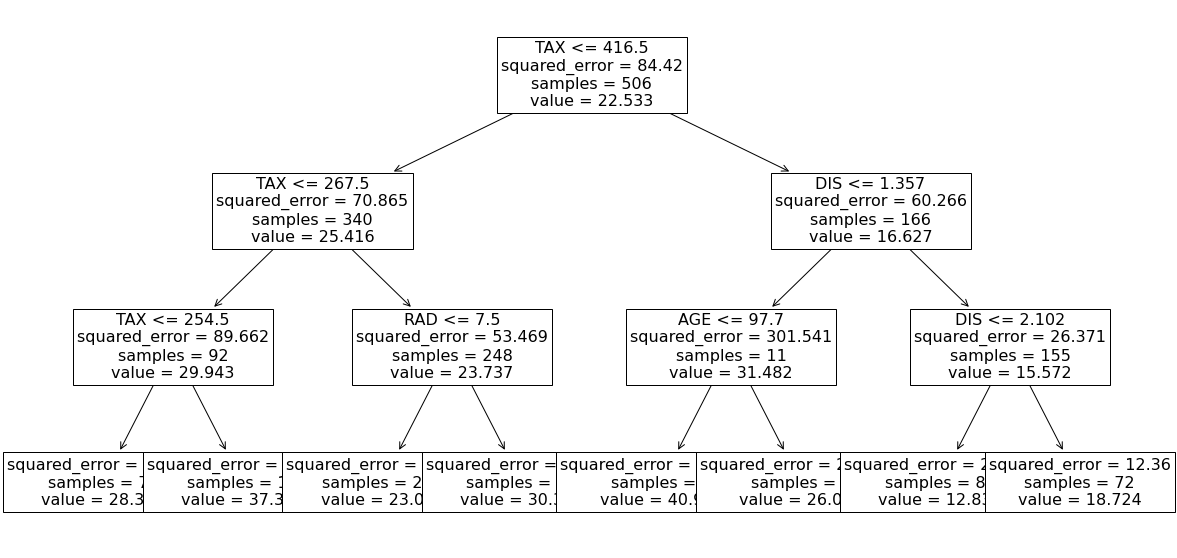

In [12]:
# Listing 20

from sklearn import datasets

d = datasets.load_boston()
df = pd.DataFrame(d['data'], columns=d['feature_names'])
y = pd.Series(d['target'])
X = df[['AGE', 'RAD', 'TAX', 'DIS']]
 
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X, y)
fig = plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, fontsize =16)
plt.show()

In [13]:
# Listing 21
def expvalue(clf, x, S):
    def g(node, w):
        left_child = clf.tree_.children_left[node]
        right_child = clf.tree_.children_right[node]
        if left_child == right_child:  # node is a leaf 
            return w*clf.tree_.value[node].squeeze()
        else: # internal node
            feature = x.index[clf.tree_.feature[node]]
            if feature in S:
                if x.loc[feature] <= clf.tree_.threshold[node]:
                    return g(left_child, w) 
                else:
                    return g(right_child, w) 
            else:    
                w_left = clf.tree_.n_node_samples[left_child] / clf.tree_.n_node_samples[node]
                w_right = clf.tree_.n_node_samples[right_child] / clf.tree_.n_node_samples[node]
                return g(left_child, w * w_left) + g(right_child, w * w_right)
    return g(0,1)

In [14]:
# Listing 22

from itertools import combinations
import scipy

def coalitions(x, col):
    remaining_features = [feature for feature in x.index if feature != col]
    for feature in range(len(remaining_features) + 1):
        for coalition in combinations(remaining_features, feature):
            yield list(coalition)
            
def coalition_contribution1(model, x, col, coalition):
    marginal_gain = expvalue(model, x, coalition + [col]) - expvalue(model, x, coalition)
    num_coalitions = 1 / (scipy.special.comb(len(x) - 1, len(coalition)) * len(x))
    return num_coalitions * marginal_gain  
            
def calculate_exact_tree_shap_values(model, X_sample):
    if isinstance(X_sample, pd.Series):
        X_sample = pd.DataFrame(X_sample).T
    shap_values_list = []
    for i in range(X_sample.shape[0]):
        x = X_sample.iloc[i]
        shap_values = []
        for col in X_sample.columns:
            shap_value =  np.sum([coalition_contribution1(model, x, col, coalition) for coalition in coalitions(x, col)])
            shap_values.append(shap_value)
        shap_values_list.append(shap_values)
    return model.tree_.value[0].squeeze().item(), shap_values_list

In [15]:
# Listing 23
calculate_exact_tree_shap_values(tree_model, X.iloc[470])

(22.532806324110698,
 [[0.17363555010556078,
   1.6225955204216065,
   -6.753886031609972,
   1.1484597480832428]])

In [16]:
# Listing 24
def tree_shap(tree, X_explain):
    if isinstance(X_explain, pd.Series):
        X_explain = X_explain.values
    elif isinstance(X_explain, pd.DataFrame):
        X_explain = X_explain.values
    tree = tree.tree_

    if len(X_explain.shape) == 1:
        phi = np.zeros(X_explain.shape[0])
        calculate_tree_shap(tree, X_explain, phi)
    elif len(X_explain.shape) == 2:
        phi = np.zeros((X_explain.shape[0], X_explain.shape[1]))
        for i in range(X_explain.shape[0]):
            calculate_tree_shap(tree, X_explain[i,:], phi[i,:])
    return tree.value.squeeze()[0].item(), phi
  
def extend(m, pz, po, pi): 
    l = len(m)
    m = m.copy()
    m.loc[l] = [pi, pz, po, 1 if l==0 else 0]  

    for i in range(l - 1, -1, -1):
        m.iloc[i+1]['w'] += po * m.iloc[i]['w'] * (i + 1) / (l + 1)
        m.iloc[i]['w'] = pz * m.iloc[i]['w'] * (l - i) / (l + 1)
    return m


def unwind(m, i): 
    m = m.copy()
    l = len(m) - 1
    n = m.iloc[l]['w'] 
    for j in range(l - 1, -1, -1):
        if m.iloc[i]['o'] != 0:
            temp = m.iloc[j]['w']
            m.iloc[j]['w'] = n * (l + 1) / ((j + 1) * m.iloc[i]['o'])
            n = temp - m.loc[j]['w'] * m.loc[i]['z'] * (l - j) / (l + 1)
        else:
            m.iloc[j]['w'] = (m.iloc[j]['w'] * (l + 1)) / (m.iloc[i]['z'] * (l - j))

    for j in range(i, l):
        m.iloc[j]['d'] = m.loc[j+1]['d']
        m.iloc[j]['z'] = m.loc[j+1]['z']
        m.iloc[j]['o'] = m.loc[j+1]['o']
    return m.iloc[:l] 

def calculate_tree_shap(tree, x, phi):
    def tree_shap_recursive(j, m, pz, po, pi):   
        # extend the unique path
        m = extend(m, pz, po, pi)
        dj = features[j]

        # leaf node
        if children_right[j] == -1:
            for i in range(1, len(m)):
                w = unwind(m, i).w.sum()
                phi[int(m.iloc[i]["d"])] += w * (m.iloc[i]["o"] - m.iloc[i]["z"]) * values[j] 

        # internal node
        else:
            h = 0
            cleft = children_left[j]
            cright = children_right[j]

            h = cleft if x[dj] < thresholds[j] else cright
            c = cright if h == cleft else cleft
            rj = node_sample_weight[j]
            rh = node_sample_weight[h] 
            rc = node_sample_weight[c] 
            iz = 1
            io = 1

            k = 0
            while (k < len(m)):
                if m.loc[k]['d'] == dj:
                    break
                k += 1

            if k != len(m):          
                iz = m.iloc[k]['z']
                io = m.iloc[k]['o']         
                m = unwind(m, k)           

            tree_shap_recursive(h, m, rh/rj*iz, io, dj)
            tree_shap_recursive(c, m, rc/rj*iz, 0, dj)
    
    children_left = tree.children_left 
    children_right = tree.children_right 
    features = tree.feature  
    thresholds =tree.threshold 
    values = tree.value.squeeze() 
    node_sample_weight = tree.weighted_n_node_samples
    
    m = pd.DataFrame({}, columns=['d', 'z', 'o', 'w'])
    tree_shap_recursive(0, m, 1, 1, -1)

In [17]:
# Listing 25
tree_shap(tree_model, X.iloc[470])

(22.532806324110698,
 array([ 0.17363555,  1.62259552, -6.75388603,  1.14845975]))

In [18]:
# phi = np.zeros((Xd.shape[0] + 1, n_outputs))
# x_missing = np.zeros(Xd.shape[0], dtype=np.bool)

# banz_explainer2 = pytree.BanzTreeExplainer.tree_shap(tree_model, Xd, x_missing, phi)
# shap_values = banz_explainer2.shap_values(Xd)

In [19]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
import numpy as np
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [20]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
d_train = xgboost.DMatrix(X_train, label=y_train)
d_test = xgboost.DMatrix(X_test, label=y_test)


In [21]:
params = {
    "eta": 0.01,
    "objective": "binary:logistic",
    "subsample": 0.5,
    "base_score": np.mean(y_train),
    "eval_metric": "logloss"
}
model = xgboost.train(params, d_train, 5000, evals = [(d_test, "test")], verbose_eval=100, early_stopping_rounds=20)

[0]	test-logloss:0.54663
[100]	test-logloss:0.36373
[200]	test-logloss:0.31793
[300]	test-logloss:0.30061
[400]	test-logloss:0.29207
[500]	test-logloss:0.28678
[600]	test-logloss:0.28381
[700]	test-logloss:0.28181
[800]	test-logloss:0.28064
[900]	test-logloss:0.27992
[1000]	test-logloss:0.27928
[1018]	test-logloss:0.27935


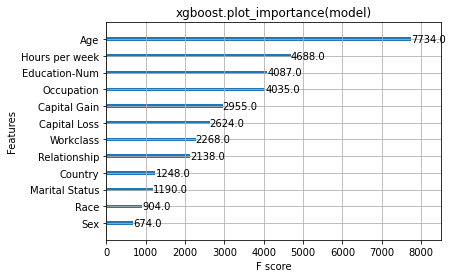

In [22]:
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [23]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
# explainer = pytree.TreeExplainer(model)
# shap_values = explainer.shap_values(X)


In [24]:
from shap import TreeExplainer as TreeCext
import time

explainer = TreeCext(model)

ile drzew cext? 1020


In [25]:
start = time.perf_counter()
values = explainer.shap_values(d_test)
end = time.perf_counter()
end - start

uruchamiam z BANZ=False


4.437910559005104

In [26]:
start = time.perf_counter()
values = explainer.shap_values(d_test, banz=True)
end = time.perf_counter()
end - start

uruchamiam z BANZ=True
uruchamiam z BANZ=True


array([[ 1.8439528e-01,  5.7934336e-02, -2.0007193e-01, ...,
        -9.0464607e-02, -1.8898621e-01,  1.7677326e-03],
       [ 6.4727634e-01,  3.5176009e-01,  7.7729851e-01, ...,
        -5.3473048e-02,  6.5905225e-01,  1.1293232e-02],
       [-2.3596919e+00, -1.8488908e-02, -1.7592610e-01, ...,
        -9.7845137e-02, -3.7298444e-01, -1.3546996e-02],
       ...,
       [-2.7271118e+00, -7.8227222e-03, -1.2568679e-01, ...,
        -7.5099550e-02, -8.4983152e-01, -2.5829921e-02],
       [-1.3343302e+00, -6.5252908e-02, -5.7369322e-01, ...,
        -7.3169626e-02, -2.0180519e-01,  1.8336764e-01],
       [ 4.5690158e-01,  4.0380638e-02,  2.7904594e-02, ...,
        -8.6134732e-02, -8.5062996e-02,  1.0792287e-02]], dtype=float32)

In [27]:
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_display.iloc[0,:])

In [28]:
# https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/tree_explainer/Python%20Version%20of%20Tree%20SHAP.html

In [29]:
import sklearn.ensemble
import shap
import numpy as np
import numba
import time
import xgboost

In [30]:
X,y = shap.datasets.boston()
X.shape



Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

(506, 13)

In [31]:
model = sklearn.ensemble.RandomForestRegressor(n_estimators=1000, max_depth=4)
model.fit(X, y)



RandomForestRegressor(max_depth=4, n_estimators=1000)

In [32]:
bst = xgboost.train({"learning_rate": 0.01, "max_depth": 4}, xgboost.DMatrix(X, label=y), 1000)

In [33]:
start = time.time()
shap_values = bst.predict(xgboost.DMatrix(X), pred_contribs=True)
print(time.time() - start)

0.10046148300170898


In [34]:
x = np.ones(X.shape[1])
# TreeExplainer(model).shap_values(x)

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
from shap.explainers.pytree import *
regr.fit(X, y)
TreeExplainer(regr)

In [36]:
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [37]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

RandomForestRegressor(max_depth=2, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)

In [39]:
print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


In [40]:
start = time.time()
pytree.TreeExplainer(regr).shap_values(X)
print(time.time() - start)

0.8534762859344482


In [41]:
from shap.explainers.pytree import TreeExplainer

start = time.time()
TreeExplainer(regr).shap_values(X)
print(time.time() - start)

0.8667693138122559


In [42]:
t = TreeExplainer(regr)

In [43]:
from pprint import pprint
pprint(vars(t.trees[1]))

{'children_default': array([ 1,  2, -1, -1,  5, -1, -1], dtype=int32),
 'children_left': array([ 1,  2, -1, -1,  5, -1, -1], dtype=int32),
 'children_right': array([ 4,  3, -1, -1,  6, -1, -1], dtype=int32),
 'features': array([ 1,  1, -2, -2,  0, -2, -2], dtype=int32),
 'max_depth': 2,
 'node_sample_weight': array([100.,  67.,  19.,  48.,  33.,  20.,  13.]),
 'thresholds': array([ 0.39371884, -1.36135513, -2.        , -2.        ,  0.68105644,
       -2.        , -2.        ]),
 'values': array([[ -3.86524288],
       [-25.76726583],
       [-57.07966521],
       [-13.3727744 ],
       [ 40.60250067],
       [ 20.3870081 ],
       [ 71.70325847]])}


In [44]:
# t.trees.predict()

In [45]:
str(type(t.trees[1]))

"<class 'shap.explainers.pytree.Tree'>"

In [46]:
pprint((regr.estimators_[1].tree_.weighted_n_node_samples.astype(np.float64)))
# pprint((regr.estimators_[1].tree_.node_sample_weight))


array([100.,  67.,  19.,  48.,  33.,  20.,  13.])


In [47]:
# pprint(dict(regr.estimators_[1].tree_))

In [48]:
for i in range(20):
    pprint(t.trees[i].node_sample_weight)

array([100.,  64.,  37.,  27.,  36.,  26.,  10.])
array([100.,  67.,  19.,  48.,  33.,  20.,  13.])
array([100.,  60.,  18.,  42.,  40.,  27.,  13.])
array([100.,  50.,  26.,  24.,  50.,  38.,  12.])
array([100.,  76.,  39.,  37.,  24.,  13.,  11.])
array([100.,  67.,  35.,  32.,  33.,   6.,  27.])
array([100.,  48.,  28.,  20.,  52.,  38.,  14.])
array([100.,  77.,  30.,  47.,  23.,  18.,   5.])
array([100.,  84.,  38.,  46.,  16.,  11.,   5.])
array([100.,  52.,  15.,  37.,  48.,  35.,  13.])
array([100.,  59.,  34.,  25.,  41.,  31.,  10.])
array([100.,  62.,  15.,  47.,  38.,  23.,  15.])
array([100.,  81.,  50.,  31.,  19.,  12.,   7.])
array([100.,  63.,  27.,  36.,  37.,  23.,  14.])
array([100.,  59.,  38.,  21.,  41.,   6.,  35.])
array([100.,  57.,  34.,  23.,  43.,  32.,  11.])
array([100.,  57.,  17.,  40.,  43.,  29.,  14.])
array([100.,  70.,  28.,  42.,  30.,  18.,  12.])
array([100.,  72.,  38.,  34.,  28.,  25.,   3.])
array([100.,  63.,  41.,  22.,  37.,  21.,  16.])


In [49]:
b_values = t.banz_values(X)
b_values

nasza implementacja banz values
dwa wymiary


array([[ 1.20625644e+01,  2.06972648e+01, -4.66599350e-02,
         1.12763338e-01],
       [ 1.27364028e+01, -2.05774540e+01, -1.02068608e-02,
         3.69832700e-02],
       [-3.35584635e+00,  2.11180510e+01, -4.66599350e-02,
         1.12763338e-01],
       [ 6.80593437e+00,  6.17612424e+00, -1.02068608e-02,
         3.69832700e-02],
       [ 1.06873174e+01, -6.89031431e+00, -1.02068608e-02,
        -8.56514791e-02],
       [-1.13952261e+01,  2.13669854e+01, -4.66599350e-02,
        -2.43583650e-01],
       [ 1.27364028e+01, -2.98817558e+01, -1.02068608e-02,
         3.69832700e-02],
       [ 1.30628624e+01,  5.00796181e+01, -4.66599350e-02,
         1.82994373e-01],
       [-8.22592974e+00, -3.22335247e+01, -1.02068608e-02,
         3.69832700e-02],
       [ 1.19599985e+01,  4.88620963e+01, -4.66599350e-02,
         1.82994373e-01],
       [-8.29856582e+00, -3.06050443e+01, -1.02068608e-02,
         3.69832700e-02],
       [-7.19773733e+00, -1.88411222e+01, -1.02068608e-02,
      

In [50]:
np.set_printoptions(suppress=True)

s_values = t.shap_values(X)
s_values

array([[ 12.06256442,  20.69726478,  -0.04665993,   0.11276334,
         -3.20691285],
       [ 12.73640279, -20.57745397,  -0.01020686,   0.03698327,
         -3.20691285],
       [ -3.35584635,  21.11805095,  -0.04665993,   0.11276334,
         -3.20691285],
       [  6.80593437,   6.17612424,  -0.01020686,   0.03698327,
         -3.20691285],
       [ 10.68731737,  -6.89031431,  -0.01020686,  -0.08565148,
         -3.20691285],
       [-11.39522609,  21.36698542,  -0.04665993,  -0.24358365,
         -3.20691285],
       [ 12.73640279, -29.88175578,  -0.01020686,   0.03698327,
         -3.20691285],
       [ 13.06286236,  50.07961814,  -0.04665993,   0.18299437,
         -3.20691285],
       [ -8.22592974, -32.23352466,  -0.01020686,   0.03698327,
         -3.20691285],
       [ 11.9599985 ,  48.86209626,  -0.04665993,   0.18299437,
         -3.20691285],
       [ -8.29856582, -30.60504432,  -0.01020686,   0.03698327,
         -3.20691285],
       [ -7.19773733, -18.84112221,  -0.010

In [51]:
regr.predict(X[0, :].reshape(1, -1))
# pokazuje ze wartosci s_values sumuja sie do predykcji dla probek 

array([29.61901976])

In [52]:
def banzhaf_brute(tree, X):
    from itertools import chain, combinations

    def powerset(iterable):
        s = list(iterable)
        return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
    
    U = list(powerset([x for x in tree.features if x != -2]))
    bval = 0.0
    for i in U:
        bval += tree.predict()
    

In [53]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [54]:
x = X[0, :]
for i in range(6):
    print(t.brute_shap(x, i))

[12.06256442]
[20.69726478]
[-0.04665993]
[0.11276334]
[0.]
[0.]


In [55]:
t.brute_banz(x, 1)

array([20.69726478])

In [56]:
diffs = [t.brute_shap(X[i, :], 2) - t.brute_banz(X[i, :], 2) for i in range(100)]
print([list(_a) for _a in diffs if _a > 0.000001])  # roznice są na poziomie eps
print(list(diffs[0]))  # przykladowa wartosc

[]
[4.996003610813204e-16]


In [57]:
# t.banz_values(X[])

In [58]:
from shap.explainers import Tree as TreeCext
t_cext = TreeCext(regr)
t_cext.shap_values(X, check_additivity=False)

ile drzew cext? 100
uruchamiam z BANZ=False
using treeshap and cext


array([[ 12.06256442,  20.69726478,  -0.04665993,   0.11276334],
       [ 12.73640279, -20.57745397,  -0.01020686,   0.03698327],
       [ -3.35584635,  21.11805095,  -0.04665993,   0.11276334],
       [  6.80593437,   6.17612424,  -0.01020686,   0.03698327],
       [ 10.68731737,  -6.89031431,  -0.01020686,  -0.08565148],
       [-11.39522609,  21.36698542,  -0.04665993,  -0.24358365],
       [ 12.73640279, -29.88175578,  -0.01020686,   0.03698327],
       [ 13.06286236,  50.07961814,  -0.04665993,   0.18299437],
       [ -8.22592974, -32.23352466,  -0.01020686,   0.03698327],
       [ 11.9599985 ,  48.86209626,  -0.04665993,   0.18299437],
       [ -8.29856582, -30.60504432,  -0.01020686,   0.03698327],
       [ -7.19773733, -18.84112221,  -0.01020686,   0.03698327],
       [ -9.35344065, -14.34162332,  -0.01020686,   0.03698327],
       [ -7.80116218, -24.57496898,  -0.01020686,   0.03698327],
       [  0.24250186,  15.90655976,  -0.01020686,   0.0702702 ],
       [ -8.02110892, -18

In [59]:
X[0, :]


array([1.76405235, 0.40015721, 0.97873798, 2.2408932 ])

In [60]:
shap.datasets.boston()

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

In [61]:
import pickle

In [62]:
s= pickle.dumps(regr)

In [63]:
import xgboost as xgb

In [64]:
import joblib
joblib.dump(regr, "my_random_forest.joblib")

['my_random_forest.joblib']

In [65]:
X,y = shap.datasets.boston()
max_depth=2  # bylo 10
model = RandomForestRegressor(max_depth=max_depth, random_state=0)
model.fit(X, y)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datase

RandomForestRegressor(max_depth=2, random_state=0)

In [66]:
t2 = TreeExplainer(model)

In [67]:
t2.shap_values(X)[0:1]

InvalidIndexError: (0, slice(None, None, None))

In [ ]:
t2.banz_values(X)[0]

In [ ]:

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import shap

X,y = shap.datasets.boston()
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X, y)
model.estimators_ = [ model.estimators_[1] ]
model.predict(X)[0]

In [ ]:
t_bos = TreeExplainer(model)
first_row = X.iloc[:1].values.tolist()[0]
first_row

In [ ]:
t_bos.shap_values(X.iloc[:1])

In [ ]:
### TU JEST NAJNOWSZY TEST

In [ ]:
t_bos.banz_values(np.asarray(first_row))

In [ ]:
t_bos.brute_shap(first_row, 5)

In [ ]:
t_bos.brute_banz(first_row, 5)

In [ ]:
pprint(vars(t_bos.trees[0]))

In [ ]:
first_row

In [ ]:
X,y = shap.datasets.boston()
full_model = RandomForestRegressor(max_depth=2, random_state=0)
full_model.fit(X, y)

In [ ]:
tenth_row = np.asarray(X.iloc[10].tolist())

t_bos_full = TreeExplainer(full_model)
t_bos_full.shap_values(X.iloc[9:10])

In [ ]:
t_bos_full.banz_values(tenth_row)

In [ ]:
X.iloc[1].tolist()